In [1]:
#pip install --upgrade --no-deps git+git://github.com/dr3y/murraylab_tools.git@master
import murraylab_tools.biotek as mt_biotek
import os
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
foldname = "biotek_examples"
dataname = "180515_big384wellplate"
suppname = "supp_inductiongrid"
data_filename = os.path.join(foldname,dataname+".csv")
supplementary_filename = os.path.join(foldname,suppname+".csv")
tidy_filename = os.path.join(foldname,dataname+"_tidy.csv")

In [2]:
mt_biotek.tidy_biotek_data(data_filename, supplementary_filename, convert_to_uM = False)

Assuming default volume 10 uL. Make sure this is what you want!
RFPGFP:580,610
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:580,610
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:580,610
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:580,610
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:485,515
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:485,515
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:485,515
RFPGFP
0
{'RFPGFP': 0}
RFPGFP:485,515
RFPGFP
0
{'RFPGFP': 0}


In [9]:
#tidy_filename = os.path.join("180515_big384wellplate_tidy.csv")
df = pd.read_csv(tidy_filename)
df.loc[df.Excitation==580,"Channel"] = "RFP"
df.loc[df.Excitation==485,"Channel"] = "GFP"

<Figure size 432x288 with 0 Axes>

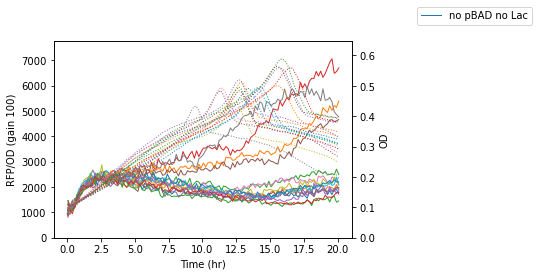

In [10]:
plotter = mt_biotek.BiotekCellPlotter(df, "RFP", 100,od_channel = "OD")
#plotter.add_well("L3", "red", "Well M3")
#plotter.add_well("M3", "red", "Well M3")
#plotter.add_well("O3", "red", "Well M3")
#plotter.add_well("P3", "red", "Well M3")
#plotter.add_well("Q3", "red", "Well M3")
#plotter.add_well("N3", "red", "Well M3")
#plotter.add_well("N3", "red", "Well M3")
plotter.add_condition((df.Gain == 100)&(df.Construct=="pQi41")&(df.aTC==250),
                       label = "no pBAD no Lac")
#df.Construct.unique()
gca = plotter.plot(show=False)
#df[(df.Gain == -1 )&(df.Construct=="pQi41")&(df.aTC==250)&(df.Well=="B8")]

In [12]:
normdf = mt_biotek.normalize(df,norm_channel="OD")
end_df = mt_biotek.window_averages(normdf,15,17,"hours")
end_df.Construct.unique()

array(['pQi41', 'REC24LB', 'pQi51', 'pQi42', 'pQi52'], dtype=object)

[500 250 125  25   0]


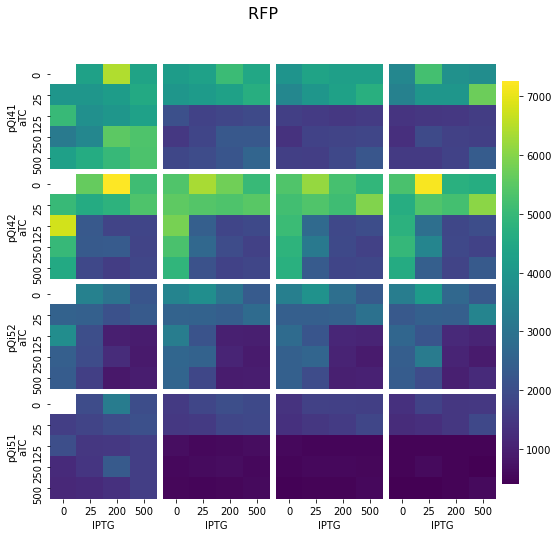

In [13]:
dims = ["aTC","IPTG","Ara"]
#fixedinds = ["Sal"]#,"ATC"]#,"Construct"]
#fixconcs = [500]#,250]
plotdf = end_df.drop(index = end_df[end_df.aTC==200].index)
#we dropped the value which corresponds to a different construct
print(plotdf.aTC.unique())
FPchan = "RFP"
constructs = ['pQi41','pQi42','pQi52','pQi51'] 
mt_biotek.multiPlot(dims,plotdf,[],[],constructs,\
                    FPchan,annot=False,vmin=None,vmax=None,cmap='viridis')
#["REC24M9"]

In [8]:
%timeit normdf = mt_biotek.normalize(df,norm_channel="OD")

280 ms ± 19.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
